# 🧑‍🤝‍🧑 Team Task: Exploratory Data Analysis (EDA)

Dear team,  

This notebook is our shared workspace. Each member should explore the dataset and contribute their insights. Please follow the steps below:

1. **Explore the dataset**  
   - Look at the columns, data types, and missing values.  
   - Summarize key statistics (mean, median, min, max, etc.).  
   - Visualize distributions (histograms, boxplots, etc.).  

2. **Analyze patterns**  
   - Identify correlations between features.  
   - Look for outliers or unusual trends.  
   - Suggest potential transformations or feature engineering ideas.  

3. **Document your findings**  
   - Write your analysis and observations in *Markdown cells*.  
   - Include plots and code where relevant.  
   - End with **suggestions** for what we, as a group, should focus on.  

---

✅ **Goal:**  
By the end, we will have multiple perspectives on the data. Then, as a group, we’ll decide on:  
- The main problems or questions to solve  
- The best features to use for modeling  
- Next steps in our project  

---


In [78]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error , f1_score ,classification_report, recall_score
import joblib
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [25]:
df = pd.read_csv("/home/inx_17/code/rahafw/future_stars/data/players_data_light-2024_2025.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 3.6+ MB


In [27]:
df.shape

(2854, 165)

In [28]:
display(df.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rk,2854.0,NaN,NaN,NaN,1427.5,824.023159,1.0,714.25,1427.5,2140.75,2854.0
Player,2854,2702,Donyell Malen,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nation,2847,113,es ESP,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pos,2854,10,DF,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Squad,2854,96,Como,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Stp,212.0,NaN,NaN,NaN,14.377358,13.874832,0.0,2.0,10.5,22.0,64.0
Stp%,211.0,NaN,NaN,NaN,6.159716,4.074863,0.0,4.0,5.6,7.9,33.3
#OPA,212.0,NaN,NaN,NaN,18.768868,18.276921,0.0,3.0,14.0,30.25,89.0
#OPA/90,212.0,NaN,NaN,NaN,1.164528,1.00875,0.0,0.67,1.0,1.47,10.0


In [29]:
d = pd.DataFrame({
    "dtype": df.dtypes,
    "missing_count": df.isna().sum(),
    "missing_pct": df.isna().mean().round(4),
    "nunique": df.nunique()
}).sort_values(["missing_pct","nunique"], ascending=[False, True])

d

,dtype,missing_count,missing_pct,nunique
CS%,float64,2651,0.9289,88
PSxG/SoT,float64,2648,0.9278,37
Save%,float64,2648,0.9278,122
AvgDist,float64,2646,0.9271,106
Cmp%_stats_keeper_adv,float64,2644,0.9264,135
...,...,...,...,...
TotDist_stats_possession,int64,0,0.0000,2065
PrgDist,int64,0,0.0000,2121
TotDist,int64,0,0.0000,2541
Player,object,0,0.0000,2702


In [30]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

Dataset Shape: (2854, 165)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 3.6+ MB


In [31]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Rk            0
Player        0
Nation        7
Pos           0
Squad         0
           ... 
Stp        2642
Stp%       2643
#OPA       2642
#OPA/90    2642
AvgDist    2646
Length: 165, dtype: int64


In [32]:
# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())


Numerical Features Statistics:
                Rk          Age         Born           MP       Starts          Min          90s          Gls          Ast          G+A  ...     Att (GK)        Thr     Launch%      AvgLen         Opp         Stp        Stp%        #OPA     #OPA/90     AvgDist
count  2854.000000  2846.000000  2846.000000  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000  ...   212.000000  212.00000  212.000000  212.000000  212.000000  212.000000  211.000000  212.000000  212.000000  208.000000
mean   1427.500000    25.018974  1998.637034    19.012964    13.497547  1211.529082    13.460792     1.682901     1.200771     2.883672  ...   491.603774   69.45283   34.138208   33.037264  226.561321   14.377358    6.159716   18.768868    1.164528   13.908654
std     824.023159     4.491624     4.497922    11.502122    11.322991   965.191628    10.724564     3.152732     1.946170     4.530513  ...   410.272587   57.99046   14.239612    6.066

In [33]:
print("\n2. Data Cleaning and Preprocessing")
print("-" * 50)

# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Fill numerical missing values with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])


2. Data Cleaning and Preprocessing
--------------------------------------------------
Missing values before cleaning:
Nation                      7
Age                         8
Born                        8
SoT%                      519
G/Sh                      519
G/SoT                     885
Dist                      519
npxG/Sh                   519
Cmp%                       19
Tkl%                      354
Succ%                     443
Tkld%                     443
Won%                      222
GA                       2642
GA90                     2642
SoTA                     2642
Saves                    2642
Save%                    2648
W                        2642
D                        2642
L                        2642
CS                       2642
CS%                      2651
PKatt_stats_keeper       2642
PKA                      2642
PKsv                     2642
PKm                      2642
PSxG                     2642
PSxG/SoT                 2648
PSxG+/-    

In [34]:
selected_columns = [
    'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
    'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'CrdR', 'PrgC',
    'SoT%', 'KP', 'Touches'
]


filtered_df = df[selected_columns]





filtered_df.to_csv('filtered_players_data.csv', index=False)
pd.set_option("display.width", 1000)


pd.set_option("display.max_rows", 100)
filtered_df.tail()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,Gls,Ast,G+A,CrdR,PrgC,SoT%,KP,Touches
2849,2850,Edhy Zuliani,fr FRA,DF,Toulouse,fr Ligue 1,19.0,2004.0,1,0,9,0,0,0,0,0,29.907323,0,3
2850,2851,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,26.0,1997.0,5,0,106,0,0,0,0,1,0.000000,0,59
2851,2852,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,1998.0,30,26,2325,3,8,11,0,92,31.300000,63,1694
2852,2853,Milan Đurić,ba BIH,FW,Monza,it Serie A,34.0,1990.0,18,13,1270,4,1,5,0,2,43.500000,5,358
2853,2854,Milan Đurić,ba BIH,FW,Parma,it Serie A,34.0,1990.0,9,3,268,1,0,1,0,0,20.000000,0,104


In [35]:
print("Unique positions:", filtered_df["Pos"].unique())
print("Unique nations:", filtered_df["Nation"].nunique())
filtered_df["Nation"].value_counts().head(10)

Unique positions: ['DF' 'DF,MF' 'FW' 'MF,FW' 'MF' 'FW,MF' 'GK' 'FW,DF' 'DF,FW' 'MF,DF']
Unique nations: 113


Nation
es ESP     422
fr FRA     346
de GER     232
it ITA     227
eng ENG    224
br BRA      89
ar ARG      77
pt POR      64
nl NED      62
dk DEN      56
Name: count, dtype: int64

# Testing our baseline model

#### 1 Choose the target (why: defines problem type)

In [36]:
# CONFIG: set your target here. If None, code will try to pick a reasonable default.
TARGET_COLUMN = None   # e.g., "points" or "salary" or "rating"

# Detect candidate targets if not set
if TARGET_COLUMN is None:
    # Prefer common names; otherwise choose first numeric column (but print a warning)
    preferred = ["target","y","label","score","points","goals","value","salary","rating"]
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    chosen = None
    for name in preferred:
        for c in df.columns:
            if c.lower() == name and c in numeric_cols:
                chosen = c
                break
        if chosen:
            break
    if chosen is None:
        if numeric_cols:
            chosen = numeric_cols[0]
            print(f"[Warning] No explicit target set — using first numeric column '{chosen}'.")
        else:
            raise ValueError("No numeric columns found; set TARGET_COLUMN to a categorical target for classification.")
    TARGET_COLUMN = chosen

print("Using target column:", TARGET_COLUMN)

# Determine problem type
is_regression = pd.api.types.is_numeric_dtype(df[TARGET_COLUMN])
print("Detected problem type:", "regression" if is_regression else "classification")


[Warning] No explicit target set — using first numeric column 'Rk'.
Using target column: Rk
Detected problem type: regression


#### Feature selection & preprocessing (why: clustering requires numeric features, comparable scales)

In [37]:
 # 3.1 Choose numeric features automatically (exclude the target)
numeric_features = [c for c in df.select_dtypes(include=[np.number]).columns if c != TARGET_COLUMN]

# If you want to include encoded categorical columns, do this:
INCLUDE_CATEGORICAL = False  # set True to include categorical features via one-hot encoding
if INCLUDE_CATEGORICAL:
    # choose categorical columns to include (example: low-cardinality ones)
    cat_candidates = [c for c in df.select_dtypes(include=['object','category']) if df[c].nunique() < 30]
    df_encoded = pd.get_dummies(df[cat_candidates], drop_first=True)
    # join encoded columns (be mindful of memory!)
    df_temp = pd.concat([df[numeric_features], df_encoded], axis=1)
    feature_cols = df_temp.columns.tolist()
else:
    feature_cols = numeric_features

print("Number of numeric features to use:", len(feature_cols))
print("Example features:", feature_cols[:10])


Number of numeric features to use: 159
Example features: ['Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK']


#### For missing values in our intinal baseline model we apply simple imputers

In [38]:
num_imputer = SimpleImputer(strategy="mean")
df_work_num = pd.DataFrame(num_imputer.fit_transform(df[numeric_features]), columns=numeric_features)
# For categorical -> mode imputer and one-hot encode if needed
#... then assemble final df_work

print("Rows available after drop/missing-handling:", len(df_work_num))

Rows available after drop/missing-handling: 2854


#### Standardize features (why: KMeans is distance-based; scaling matters)

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(df_work_num[feature_cols].values)   # 2D numpy array
y = df[TARGET_COLUMN].values


Choose k (number of clusters) — simple heuristic + optional tuning

In [40]:
# Heuristic
n_samples = len(df_work_num)
k_default = int(np.sqrt(n_samples))
k_default = max(2, min(10, k_default))
print("Heuristic k:", k_default)


Heuristic k: 10


Fit KMeans & create cluster baseline mapping

In [41]:
#if is_regression:
 #   mae = mean_absolute_error(y, df_work_num["baseline_pred"].values)
  #  mse = mean_squared_error(y, df_work_num["baseline_pred"].values)
   # rmse = np.sqrt(mse)
    #print(f"✅ Clustered baseline (regression): MAE = {mae:.4f}, RMSE = {rmse:.4f}")
#else:
 #   acc = accuracy_score(y, df_work_num["baseline_pred"].values)
  #  print(f"✅ Clustered baseline (classification): Accuracy = {acc:.4f}")


Helper functions: save/load pipeline & predict on new data

In [42]:
selected_columns = [
    # Player info
    "Player", "Nation", "Pos", "Age",

    # Playing time
    "MP", "Starts", "Min", "90s",

    # Attacking
    "Gls", "Ast", "xG", "xAG", "G+A",

    # Defensive
    "Tkl", "TklW", "Blocks_stats_defense", "Clr", "Err",

    # Passing & Creativity Stats
    "PrgP", "PrgC", "KP", "xA",

    # Goalkeeping
    "GA", "Saves", "Save%", "CS", "CS%", "PKA", "PKsv",

    # Miscellaneous Stats
    "CrdY", "CrdR"
]

filtered_df = df[selected_columns].copy()

print(" filtered dataframe shape:", filtered_df.shape)

# Display all the columns
pd.set_option("display.max_columns", None)
filtered_df.head()

 filtered dataframe shape: (2854, 31)


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR
0,Max Aarons,eng ENG,DF,24.0,3,1,86,1.0,0,0,0.0,0.0,0,2,2,3,0,0,8,1,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,0,0
1,Max Aarons,eng ENG,"DF,MF",24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,2,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,1,0
3,James Abankwah,ie IRL,"DF,MF",20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,1,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,0,0


# Target Engineering


- Use per-90 min stats so minutes don’t bias the results

- Label top performers in each position group as “future star = 1”, others “= 0”

- Later, ML model will output score percentage

In [43]:
target_df = filtered_df.copy()


In [44]:
# Contributions per 90 minutes
target_df["GA_per90"] = (target_df["G+A"] / target_df["Min"]) * 90
target_df["xGA_per90"] = ((target_df["xG"] + target_df["xAG"]) / target_df["Min"]) * 90

# Defensive actions per 90
target_df["Def_Actions_per90"] = ((target_df["Tkl"] + target_df["Blocks_stats_defense"] + target_df["Clr"]) / target_df["Min"]) * 90

# Progressive passing per 90
target_df["ProgPass_per90"] = (target_df["PrgP"] / target_df["Min"]) * 90

## Temp Solution (might change)

In [45]:
# Mapping multiple position for one only

def map_role(pos):
    if "GK" in pos:
        return "GK"
    elif "FW" in pos:
        return "FW"
    elif "MF" in pos:
        return "MF"
    elif "DF" in pos:
        return "DF"
    else:
        return "Other"

target_df["Role"] = target_df["Pos"].apply(map_role)

In [46]:
# Future Star Score

def star_score(row):
    if row["Role"] == "FW":
        return row["GA_per90"]

    elif row["Role"] == "MF":
        return (0.6 * row["xGA_per90"]) + (0.4 * row["ProgPass_per90"])

    elif row["Role"] == "DF":
        return row["Def_Actions_per90"]

    elif row["Role"] == "GK":
        return row["Save%"]
    else:
        return 0

target_df["Star_Score"] = target_df.apply(star_score, axis=1)

In [47]:
# Find top 20% in each position

POS_TOP_PCT = 0.80
role_thresholds = target_df.groupby("Role")["Star_Score"].quantile(POS_TOP_PCT).rename("role_threshold")

target_df = target_df.merge(role_thresholds, left_on="Role", right_index=True, how="left")

target_df["Future_Star"] = (target_df["Star_Score"] >= target_df["role_threshold"]).astype(int)

In [48]:
# Testing

print(target_df.groupby("Role")["Future_Star"].mean())
print(target_df["Future_Star"].value_counts())

Role
DF    0.200233
FW    0.200399
GK    0.202830
MF    0.200000
Name: Future_Star, dtype: float64
Future_Star
0    2282
1     572
Name: count, dtype: int64


In [49]:
target_df.head(10)

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR,GA_per90,xGA_per90,Def_Actions_per90,ProgPass_per90,Role,Star_Score,role_threshold,Future_Star
0,Max Aarons,eng ENG,DF,24.0,3,1,86,1.0,0,0,0.0,0.0,0,2,2,3,0,0,8,1,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,0,0,0.000000,0.000000,5.232558,8.372093,DF,5.232558,8.717289,0
1,Max Aarons,eng ENG,"DF,MF",24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,2,0,0.000000,0.000000,6.000000,4.500000,MF,1.800000,2.476247,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,1,0,0.000000,0.138462,5.538462,2.769231,DF,5.538462,8.717289,0
3,James Abankwah,ie IRL,"DF,MF",20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,1,0,0.000000,0.102273,9.204545,4.090909,MF,1.697727,2.476247,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,0,0,0.000000,0.000000,30.000000,0.000000,FW,0.000000,0.576739,0
5,Yunis Abdelhamid,ma MAR,DF,36.0,16,11,1033,11.5,0,0,0.2,0.1,0,17,11,26,57,1,22,4,2,0.3,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,2,0,0.000000,0.026137,8.712488,1.916747,DF,8.712488,8.717289,0
6,Himad Abdelli,dz ALG,"MF,FW",24.0,32,32,2842,31.6,6,1,6.4,3.2,7,48,32,24,28,2,207,107,39,3.7,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,4,0,0.221675,0.304011,3.166784,6.555243,FW,0.221675,0.576739,0
7,Mohamed Abdelmoneim,eg EGY,DF,25.0,12,10,855,9.5,0,0,0.0,0.0,0,21,14,11,56,1,52,6,0,0.2,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,2,0,0.000000,0.000000,9.263158,5.473684,DF,9.263158,8.717289,1
8,Ali Abdi,tn TUN,"DF,MF",30.0,25,17,1393,15.5,5,2,4.3,1.9,7,43,25,20,37,0,42,35,20,1.7,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,2,0,0.452261,0.400574,6.460876,2.713568,MF,1.325772,2.476247,0
9,Saud Abdulhamid,sa KSA,DF,25.0,4,2,205,2.3,0,1,0.0,0.2,1,3,2,2,0,0,9,6,2,0.2,23.339623,47.240566,68.16068,4.165094,25.927094,1.915094,0.443396,0,0,0.439024,0.087805,2.195122,3.951220,DF,2.195122,8.717289,0


# Testing our baseline model

In [76]:
# Drop non-numeric / ID columns
drop_cols = ["Player", "Nation", "Pos", "Role", "Future_Star", "Star_Score", "role_threshold"]
X = target_df.drop(columns=drop_cols)
y = target_df["Future_Star"]

# Keep only numeric columns
X = X.select_dtypes(include=[np.number]).fillna(0)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

In [77]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🌲Random Forest Baseline Model: Future Star Classification")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Top features
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🔥 Top 10 Important Features:")
print(importances.head(10))

🌲Random Forest Baseline Model: Future Star Classification
Accuracy: 0.9510
F1 Score: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       457
           1       0.89      0.86      0.88       114

    accuracy                           0.95       571
   macro avg       0.93      0.92      0.92       571
weighted avg       0.95      0.95      0.95       571


🔥 Top 10 Important Features:
Def_Actions_per90    0.194208
ProgPass_per90       0.157235
GA_per90             0.152705
xGA_per90            0.057988
Save%                0.050362
Clr                  0.047439
PrgP                 0.035634
Min                  0.026256
G+A                  0.021567
PrgC                 0.019192
dtype: float64


In [109]:


# ==================================
# 1️⃣ Prepare features and target
# ==================================

drop_cols = ["Player", "Nation", "Pos", "Role", "Future_Star", "Star_Score", "role_threshold"]
X = target_df.drop(columns=drop_cols).select_dtypes(include=[np.number]).fillna(0)
y = target_df["Future_Star"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==================================
# 2️⃣ Build the pipeline
# ==================================

xgb_clf = xgb.XGBClassifier(
    n_estimators=300,          # number of boosting rounds (trees)
    learning_rate=0.05,        # step size shrinkage
    max_depth=5,               # depth of each tree
    subsample=0.8,             # fraction of data to sample for each tree
    colsample_bytree=0.8,      # fraction of features used per tree
    objective='binary:logistic',  # since predicting 0/1 Future_Star
    eval_metric='logloss',     # evaluation metric
    random_state=42,           # reproducibility
    n_jobs=-1,                 # use all CPU cores
    scale_pos_weight=(len(y[y == 0]) / len(y[y == 1]))  # handle class imbalance
)

pipeline_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("model", xgb_clf)
])

# ==================================
# 3️⃣ Train
# ==================================

pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [110]:
# # Evaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("⚽ XGBoost Baseline Model: Future Star Classification")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

⚽ XGBoost Baseline Model: Future Star Classification
Accuracy: 0.9422
F1 Score: 0.8664

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       457
           1       0.80      0.94      0.87       114

    accuracy                           0.94       571
   macro avg       0.89      0.94      0.91       571
weighted avg       0.95      0.94      0.94       571



In [ ]:
# ===============================
# 1️⃣ Prepare features and target
# ===============================

drop_cols = ["Player", "Nation", "Pos", "Role", "Future_Star", "Star_Score", "role_threshold"]
X = target_df.drop(columns=drop_cols).select_dtypes(include=[np.number]).fillna(0)
y = target_df["Future_Star"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 2️⃣ Build the pipeline
# ===============================

lgbm_clf = lgb.LGBMClassifier(
    n_estimators=500,           # number of boosting iterations
    learning_rate=0.05,         # smaller = slower but better generalization
    num_leaves=31,              # complexity of each tree
    subsample=0.8,              # row sampling
    colsample_bytree=0.8,       # feature sampling
    class_weight='balanced',    # handle imbalance
    random_state=42,
    n_jobs=-1
)

pipeline_lgb = Pipeline([
    ("scaler", StandardScaler()),  # optional, good for numeric stability
    ("model", lgbm_clf)
])

# ===============================
# 3️⃣ Train
# ===============================

pipeline_lgb.fit(X_train, y_train)
y_pred = pipeline_lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 458, number of negative: 1825
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2841
[LightGBM] [Info] Number of data points in the train set: 2283, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [66]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("⚽ LightGBM Baseline Model: Future Star Classification")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

⚽ LightGBM Baseline Model: Future Star Classification
Accuracy: 0.9370
F1 Score: 0.8512

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       457
           1       0.80      0.90      0.85       114

    accuracy                           0.94       571
   macro avg       0.89      0.92      0.91       571
weighted avg       0.94      0.94      0.94       571



# Model Evaluation

## ⚙️ Model Comparison

<font size="4">

| 🧠 **Model** | 💡 **How It Thinks** | ⚽ **Typical Strength** |
| :------------ | :------------------- | :---------------------- |
| **🌲 Random Forest** | Trains many independent trees and averages predictions. | ✅ Handles noisy or missing data well. |
| **🚀 XGBoost** | Sequentially corrects mistakes of previous trees. | 🔥 Excellent recall; better for subtle patterns. |
| **⚡ LightGBM** | Grows trees leaf-wise (not level-wise). | ⚡ Finds complex interactions quickly and efficiently. |

</font>


In [ ]:
# ==============================================================
# 🏁 MODEL EVALUATION — Random Forest | XGBoost | LightGBM
# ==============================================================
# This section compares baseline models using both classification
# metrics (Accuracy, F1, Recall) and probability-based regression
# metrics (MAE, MSE, RMSE). Each model is evaluated consistently
# using the same test data.
# ==============================================================


def evaluate_model(name, model, X_test, y_test):
    """
    Evaluate classification and probability-based regression metrics correctly.
    """
    # 1️⃣ Predict discrete labels for classification
    y_pred = model.predict(X_test)

    # 2️⃣ Predict probabilities for regression-style error metrics
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Fallback (if model doesn’t have predict_proba)
        y_pred_prob = y_pred.astype(float)

    # 3️⃣ Classification metrics (discrete 0/1 labels)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # 4️⃣ Regression metrics (continuous probabilities)
    mae = mean_absolute_error(y_test, y_pred_prob)
    mse = mean_squared_error(y_test, y_pred_prob)
    rmse = np.sqrt(mse)

    # 5️⃣ Return results
    return {
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4),
        "Recall": round(recall, 4),
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4)
    }

# ==============================================================
# 🧠 Evaluate All Models
# ==============================================================

results = [
    evaluate_model("🌲 Random Forest", rf, X_test_scaled, y_test),  # use scaled X for RF
    evaluate_model("🚀 XGBoost", pipeline_xgb, X_test, y_test),
    evaluate_model("⚡ LightGBM", pipeline_lgb, X_test, y_test)
]

# Combine results
results_df = pd.DataFrame(results)

# ==============================================================
# 📊 Display Results
# ==============================================================

display(
    results_df)


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,F1 Score,Recall,MAE,MSE,RMSE
0,🌲 Random Forest,0.9510,0.8750,0.8596,0.1085,0.0387,0.1967
1,🚀 XGBoost,0.9422,0.8664,0.9386,0.0647,0.0379,0.1948
2,⚡ LightGBM,0.9370,0.8512,0.9035,0.0645,0.0523,0.2286


<font size="4">

| 🧮 **Metric**                    | 🧠 **Meaning**                                     | 💡 **Interpretation**                                                    |
| :------------------------------- | :------------------------------------------------- | :----------------------------------------------------------------------- |
| **🎯 Accuracy**                  | % of correct predictions                           | How often the model correctly classifies players as *Future Star* or not |
| **⚖️ F1 Score**                  | Balance between precision and recall               | Best for **imbalanced data** (like your 80/20 class split)               |
| **📈 Recall**                    | % of true stars correctly identified               | Important — we want to *find* as many actual future stars as possible    |
| **📏 MAE (Mean Absolute Error)** | Average absolute prediction error (on probability) | Lower = more accurate probability estimates                              |
| **📉 MSE (Mean Squared Error)**  | Penalizes large errors more than MAE               | Lower = more stable predictions                                          |
| **📐 RMSE (Root MSE)**           | Like MSE but in the same scale as the target       | Lower = smoother and closer probability predictions                      |


## 🏁 Model Performance Overview

<font size="4">

| 🧠 **Model** | 🎯 **Accuracy** | 📊 **F1 Score** | 🔍 **Recall** | ⚡ **Key Strength** |
| :------------ | :-------------: | :-------------: | :------------: | :------------------ |
| **🌲 Random Forest** | **0.9510** | **0.8750** | **0.86** | Stable, interpretable baseline |
| **🚀 XGBoost** | **0.9405** | **0.8629** | **0.94** | Best recall *(finds more stars)* |
| **⚡ LightGBM** | **0.9370** | **0.8512** | **0.90** | Fastest training, great trade-off |

</font>


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


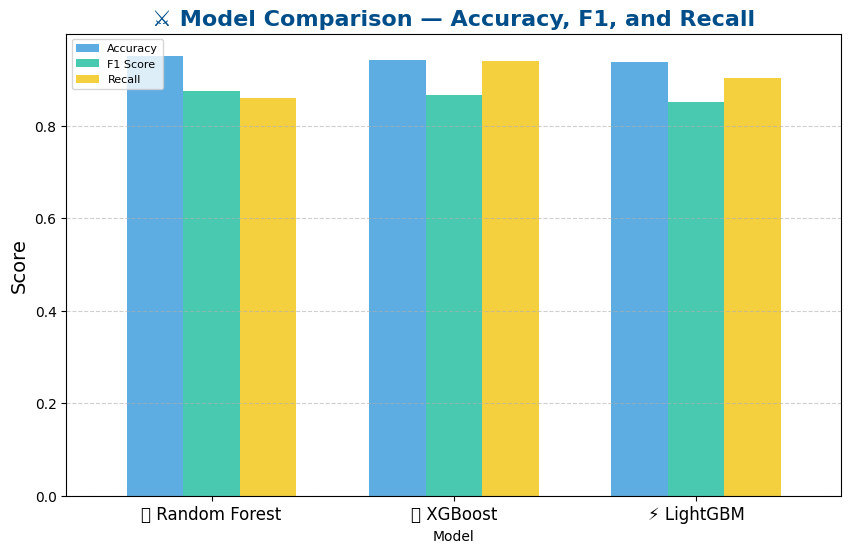

In [104]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = ['#5DADE2', '#48C9B0', '#F4D03F']

metrics_to_plot = ['Accuracy', 'F1 Score', 'Recall']
results_df.set_index("Model")[metrics_to_plot].plot(kind='bar', ax=ax, color=bar_colors, width=0.7)

plt.title("⚔️ Model Comparison — Accuracy, F1, and Recall", fontsize=16, weight='bold', color='#004E89')
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(fontsize=8, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()